# AI Academy Semester 1 Capstone

Last Updated: 2022-08-01  
Collaborators: A. Donahue, C. Lineman, N. Netznik, T.V. Nguyen, A. White

# Table of Contents

1. [Background](#background)
2. [Importing and Examining Data Sources](#imports)
    1. [Imports](#imports)
    2. [Data Discussion](#data)
3. [Data Preparation and Cleaning](#cleaning)
4. [Analysis of Selected Variables](#analysis)
    1. [Budget](#budget)
    2. [Genre](#genre)
    3. [Director](#director)
    4. [Season](#season)
5. [Conclusion](#conclusion)

<a name="background"></a>
# <span style="color: blue;">Background</span>

### Business Case

Original video content is a growing field into which many big businesses are investing. The client, Computing Vision, would like to begin creating their own original videos, so they are creating a new movie studio. They are seeking assistance in understanding the current trends in films, specifically which kinds movies are currently doing the best at the box office. The head of their new studio will use these insights to drive their own choices in movie creation.

### Scope

This study will use a variety of historic data on recent movie performance to illuminate trends in profitability and to develop actionable insights for the head of Computing Vision's new movie studio. We will limit data to the range of 2010-present (where available) to ensure that insights are still valid.

### Purpose

The results of this study will provide statistical support for at least three actionable insights that Computing Vision can use to **maximize profits and performance** from their new movie studio.  
Profit will be defined two ways within this study. Gross profit refers to the absolute amount of money earned by a movie release. Percent profit refers to a percentage of the initial budgit that the movie returned above and beyond the initial budget. Thus, a movie with a \\$3 million budget that made \\$9 million at the box office would have a gross profit of \\$9 million and a percent profit of 2.0 (or 200\%).

<a name="imports"></a>
# <span style="color: blue;">Importing and Examining Data Sources</span>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile
import scipy.stats as st
import math

# suppress futurewarnings from statistical packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.ticker as mticker
from tabulate import tabulate
import plotly.express as px

In [92]:
#read data
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ANSI')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

zip_file = "zippedData/im.db.zip"
try:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall("zippedData/unZipped/")
        print("Extracted all")
except:
    print("Invalid file")

conn = sqlite3.connect("zippedData/unZipped/im.db")

Extracted all


<a name="data"></a>
### Data Sources

Our team has thoroughly reviewed 5 different sources of data in which we were able to pull detailed insights that will help lead Computing Vision to success in the movie creation realm. 

#### Sources

* Box Office Mojo(https://www.boxofficemojo.com/)
* IMDB (https://www.imdb.com/)
* Rotten Tomatoes (https://www.rottentomatoes.com/)
* TheMovieDB (https://www.themoviedb.org/)
* The Numbers (https://www.the-numbers.com/)

#### Box Office Mojo

Our team imported Data from Box Office Mojo as we found that it to be a credible resource that provided with a large amount of data and information regarding movie gross values. We successfully pulled and sized the data to present us with a data frame of 3387 movies including the movie title, the studio of production, the domestic and foreign gross values of each movie, and the year the movie was released as well. 



#### IMDB

Internet Movie Database (IMDb) is considered the largest and most comprehensive movie databases. This database provides information related to films, television series, home videos, video games, and streaming content. Our team found this source to be a valuable as it allowed us to view a large depository of movies specific information. This source allowed us to pull a wide arrange of data and source into different tables that includes information on movie personal, principals, directors, writer, rating, basics, etc.

#### Rotten Tomatoes 

Rotten Tomatoes is a review aggregation website for film and television. Rotten Tomatoes is one of the most trusted recommendations recourses for quality of entertainment. Rotten tomatoes specify in reviews from critics and provides a comprehensive guide on ratings for movies. We were able to use this source to specify the relation of Rotten Tomatoes rating and movies success. As well link these rating to several different aspects in which we give insights on throughout the analysis. This source was able to provide was with multiple different data frames in which our team use primarily in two which include data on Movie reviews and Movie specific information.  Regarding movie information we were successfully able to pull data on 1560 movies with details regarding synopsis, MPA Rating (PG, PG13, R, etc.), genre, director, writer, Theater date, DVD release date, currency, Box office sales, movie runtime, and production studio.  

As well with the use of Rotten tomatoes source we were able to import a data frame allowing us to view details on movie reviews. We were able to import 54432 data points that gave us compressive information regarding movie ID, distinct reviews, review rating, fresh/rotten specification, critic of the review, the top critic, publisher, and date of review. We must note that this data frame provided was with multiple reviews from different critics through different publishers on different dates for the movies. 


#### The MovieDB 

The Movie Database (TMDB) is a community-built movie and TV database. This data base was able to provide us insights on individual movie specifics and there rating.  We were able to successfully import 26517 movies with information regarding genre, language, title, popularity, release date, vote average and vote count regarding movie rating. 

#### The Numbers

The Numbers is a film industry data website that tracks box office revenue.  We primarily used this source to generate a data frame that provided information regarding movie budgets. Digging deeper we were able to pull information for 5782 movies with details on Release date, Movie title, production budget, domestic gross, and worldwide gross. Our team found this provided data to valuable in regards of generating profit percentage and movie success throughout our overall analysis. 

#### Limitations  

We must also note that our team did run into some limitations when it came to connecting and merging data frames due to differentiation in primary keys. Our team found that the best fit primary key to over come this issue was merging and connecting through movie titles. 

The specific limitation with the use of titles is that they could potentially be less consistent than numeric identifiers and it limits the effective size of our sets for analysis to those which have these common keys.

<a name="cleaning"></a>
# <span style="color: blue;">Data Preparation & Cleaning</span>

In [93]:
# Turn foreign gross to an int
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',','')
movie_gross['foreign_gross'] = movie_gross["foreign_gross"].astype("float64")

# Turned run time into an integer
movie_info['runtime'] = movie_info['runtime'].str.replace(' minutes','')
movie_info['runtime']  = movie_info['runtime'].astype("float64")

# Turned box_offices into an interger
movie_info['box_office'] = movie_info['box_office'].str.replace(',','')
movie_info['box_office'] = movie_info['box_office'].astype("float64")

# Change currency to binary variable
for i in movie_info['currency']:
    if i is not None:
        i = 1
    else:
        i = 0

# Update 'fresh'/'rotten' in reviews to boolean variable
reviews['fresh'] = reviews['fresh'].str.replace('fresh','1')
reviews['fresh'] = reviews['fresh'].str.replace('rotten','0')
reviews['fresh']  = reviews['fresh'].astype("float64")

reviews.drop_duplicates(inplace=True)

A brief analysis reveals that ratings within the Rotten Tomatoes reviews database are very inconsistent. We seek to clean and reorganize these ratings to make them usable.

We will make the following modifications to the ratings column:

* We will be changing all letter "grades" to numerical scores out of 10, evenly distributed between 0 and 10.
    * Note that F+ and F- will be grouped with F.
* We will be replacing all NaN ratings, ratings out of 2, all ratings without an "out-of" denominator, and any other nonsensical ratings with '-1/1'. This will allow us to split all ratings by the '/' character before making further calculations in the future; upon performing these calculations we will go back and reset all '-1/1' values to NaN.

In [94]:
# Change letter ratings to numerical (out of 10)
reviews['rating'].replace('F+', 'F', inplace=True)
reviews['rating'].replace('F-', 'F', inplace=True)

letter_ratings = ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F']
nums = list(np.round(np.linspace(0,10, 13), 1))
num_ratings = [f'{str(num)}/10' for num in nums]
mapping = dict(zip(letter_ratings, num_ratings))

for rating in letter_ratings:
    reviews.replace(rating, mapping[rating], inplace=True)

reviews['rating'].fillna('-1/1', inplace=True)
    
# Remove all ratings that do not contain '/'
for rating in reviews['rating'].unique():
    if "/" not in rating:
        reviews['rating'].replace(rating, '-1/1', inplace=True)

# Remove other nonsensical ratings
reviews['rating'].replace('R', '-1/1', inplace=True)
reviews['rating'].replace('N', '-1/1', inplace=True)
reviews['rating'].replace('T', '-1/1', inplace=True)

reviews['rating'].replace('1/2', '-1/1', inplace=True)
reviews['rating'].replace('2/2', '-1/1', inplace=True)
reviews['rating'].replace('3/2', '-1/1', inplace=True)
reviews['rating'].replace('3 1/2', '-1/1', inplace=True)
reviews['rating'].replace('1-5', '-1/1', inplace=True)
reviews['rating'].replace('5/4', '-1/1', inplace=True)
reviews['rating'].replace('2.1/2', '-1/1', inplace=True)
reviews['rating'].replace('5.5/5', '-1/1', inplace=True)

In [95]:
# Remove unwanted symbols from string values and cast string values as floats

movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',','')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype("float64")

movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',','')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype("float64")

movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',','')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype("float64")

# Change type of release_date to datetime
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

# Clean titles to make them consistent/comparable

movie_gross['title'] = movie_gross['title'].str.strip().str.replace('[^\w\s]', '')
movies['original_title'] = movies['original_title'].str.strip().str.replace('[^\w\s]', '')
movie_budgets['movie'] = movie_budgets['movie'].str.replace("â€™", "'") # replaces improperly encoded ' characters
movie_budgets['movie'] = movie_budgets['movie'].str.strip().str.replace('[^\w\s]', '')

movie_gross['title'] = movie_gross['title'].str.upper()
movies['original_title'] = movies['original_title'].str.upper()
movie_budgets['movie'] = movie_budgets['movie'].str.upper()


<a name="analysis"></a>
# <span style="color: blue;">Analysis of Selected Variables</span>

<a name="budget"></a>
## Budget vs. Profit Ratio

The approach looking into Budget and Profit Ratio is see if that if lower budget movies return a higher rate of profit than a higher budget movie. We use profit ratio becasue it takes inflation into account and a better analysis of how much money you are making per what you are putting in. This information can help the business find out how to get more value for their dollars. 

In [96]:
#Setting up a total profit 
movie_budgets["profit"] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
movie_budgets["profitRatio"] = movie_budgets['profit'] / movie_budgets['production_budget']
# Set up and merge of two dataframes 
movie_budgets.rename(columns = {'movie' : 'title'}, inplace = True)
grossJoinBudget = pd.DataFrame.merge(movie_gross, movie_budgets, on = 'title')

# Filling the nulls with 0 because if there is no value in a forgien or domestic market, then it is assumed that there 
# was not box office sales in that region.
grossJoinBudget.fillna(0, inplace=True)

We choose a 2.12 million dollar cut off because according to Stephen film study, the average low budget movie budget is around 2.12 million dollars. For more information you can use the following link: https://stephenfollows.com/average-budget-low-micro-budget-film/

In [97]:
grossJoinBudget['budget_type'] = grossJoinBudget['production_budget'].map(lambda x: 'high' if x >= 2120000  else 'low' )

We are removing 'THE GALLOWS' due to the severity of its distance from the distubution. This data point unjustly skewed the data. This is a fair compremise to keep the most data points and taking out any misleading data.

In [98]:
#Removing all the outliers
grossJoinBudget = grossJoinBudget.loc[(grossJoinBudget['title'] != 'THE GALLOWS')]


In [99]:
fig = px.histogram(grossJoinBudget, x="year", y="profitRatio",
            barmode='group', color = 'budget_type', histfunc='avg',
             height=400)

fig.update_layout(
    title_text="Budget Type vs. Profit Ratio", # title of plot
    xaxis_title_text= 'Year', # xaxis label
    yaxis_title_text='Average Profit Ratio', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)



fig.show()

From this bar chart, we can see that Low budget films tend to have a higher profit ration. We should look further into this data to see if there is a satisitcal significants to lower budget movies producing higher Profit Ratios. 

#### Hypothesis test for budget vs profit ratios  

We will conduct a one-tailed two sample t-test with a 5% level of significance to conclude whether low budget movies yield higher product ratios on average than high budget movies.

    Null: There is no difference in profit ratios between high and low budget movies.
    Alternative: Low budget movies yield higher product ratios on average than high budget movies.

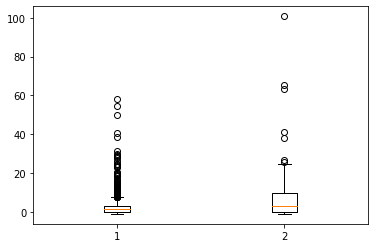

In [100]:
#Breaking the profit into high budget and low budget
HighProfitRatioSample = grossJoinBudget.loc[(grossJoinBudget['budget_type'] == 'high')]['profitRatio']
LowProfitRatioSample = grossJoinBudget.loc[(grossJoinBudget['budget_type'] == 'low')]['profitRatio']

#drops all the null values
HighProfitRatioSample =HighProfitRatioSample.dropna()
LowProfitRatioSample =LowProfitRatioSample.dropna()

#demonstrates the distrubtion of the data set.
plt.boxplot([HighProfitRatioSample, LowProfitRatioSample]);

This box and whiskey plot deminstrates the distubution of values in the high budget and the low budget. From this plot we can not see much if a diffence between the two. Lets see if a 1 tail 2 sample t-test will give us any more insight.

In [101]:
#1-tail 2-sample t-test
stat, pval = st.ttest_ind(LowProfitRatioSample,HighProfitRatioSample,equal_var = False)
pval/2

0.001060586812345834

**Conclusion:** 

From our hypothesis testing we can reject the Null hypothesis. This means that low budget movies have a better profit margin than higher budget movies. This could save a movie studio money becuase they will make better profit margins.

**Business Recommendation**

Our team would recommend that you product lower budget movies compared to higher budget movies. From our research we have found that even though you will be making less of a gross profit, you will be making a better profit margin. This will allow you to make more money in the long run. It will minizie your expensies while increaseing your profit margins. Saving the company money and putting more money in the bank.

<a name="genre"></a>
## Genre vs. Profit Ratio

The movie business might look pretty glamorous and lucrative. We wanted to take a look at the profit ratios of major genres around the world relative to their global average popularity to determine which genres are the most profitable. I also think that genre is important for any studio creating a new movie. If we investigate this data, we can infer what genre is the best for the audience. I wanted to use this dataset to get a deeper understanding of profit ratio between different genres. I will be performing ANOVA and t-tests between the genres and profit ratio.

In [102]:
movie_budgets1 =pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

movie_budgets1['production_budget'] = movie_budgets1['production_budget'].apply(clean_currency).astype('float64')
movie_budgets1['domestic_gross'] = movie_budgets1['domestic_gross'].apply(clean_currency).astype('float64')
movie_budgets1['worldwide_gross'] = movie_budgets1['worldwide_gross'].apply(clean_currency).astype('float64')
movie_budgets1["release_date"] = pd.to_datetime(movie_budgets1["release_date"])

q1= """
SELECT * 
FROM movie_basics
INNER JOIN movie_ratings
USING("movie_id")
INNER JOIN movie_akas
USING("movie_id")
"""
sql_dataset_merge1 = pd.read_sql(q1,conn)
#find and remove duplicate rows across'movie_id', 'title', 'start_year' columns 
duplicateRows = sql_dataset_merge1[sql_dataset_merge1.duplicated(['movie_id','title', 'start_year'])]
data1= sql_dataset_merge1.drop(duplicateRows.index,axis=0)
#create new "release_year" column for merging 2 datatset
movie_budgets1['release_year']= movie_budgets1['release_date'].dt.year
##merge 2 dataset by using title and released year
merge_data= movie_budgets1.merge(data1, how= 'inner', left_on=['movie','release_year'], right_on= ['title','start_year'])
dataset= merge_data[[ 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross',
       'start_year',
       'runtime_minutes', 'genres']]
#drop 7 rows with NA
dataset=dataset.dropna()
## calulate profit by subtracting gross and budget  by subtracting gross and budget domestic_gross
dataset['profit']= dataset['worldwide_gross']- dataset['production_budget']
##calulate profit ratio
dataset['profit_ratio'] = (dataset['profit'] - dataset['production_budget'])/ dataset['production_budget']


## top 5 greatest profit ratio 
dataset.sort_values(['profit_ratio'], ascending=False).head()

##this code check which movies in specific genre
#dataset[dataset['genres']. str.contains("Drama")]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit,profit_ratio
1565,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,2015,81.0,"Horror,Mystery,Thriller",41556474.0,414.564740
1465,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,2012,83.0,Horror,100759490.0,99.759490
1338,2010-10-20,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,2010,91.0,Horror,174512032.0,57.170677
1242,2017-02-24,Get Out,5000000.0,176040665.0,255367951.0,2017,104.0,"Horror,Mystery,Thriller",250367951.0,49.073590
1436,2016-10-21,Moonlight,1500000.0,27854931.0,65245512.0,2016,111.0,Drama,63745512.0,41.497008


The dataset contain 1581 movies after 2010. Each movie include 1 main genre and up to 2 sub-genres. After exploring the dataset, I found that action is the most expensive genre with the high budget. It makes sense because action films take longer to shoot and build intense sequences that put people in danger to draw the attention of audience. Therefore, action movies bring low profit ratio returns. On the other side, horror movies are typically low budget with high profit ratios and have some extreme examples of profit ratio such as The Gallow (2015), The Devil Inside (2012), etc.


I want to split up the genres column cells so we can tally each genre individually. Next I'll remove the 'genres' column (with multiple values) and replace it with a 'genre' column (with single values). Then I'll make sure that there is a new row for each genre, so there will be multiple rows with the same movie_title.


In [103]:

df_split_genre = dataset.copy()
# limit data to 2010-present
df_split_genre = df_split_genre.loc[df_split_genre['release_date'].dt.year >= 2010]
split_genre = df_split_genre['genres'].str.split(',').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
df_split_genre = df_split_genre.drop(['genres'], axis=1).join(split_genre)
##remove outlier with only 1 movie genre which is News
df_split_genre= df_split_genre[df_split_genre['genre_split']. str.contains("News")== False]
##differrence genre in the dataset
#df_split_genre['genre_split'].unique()

### Visualizing the dataset

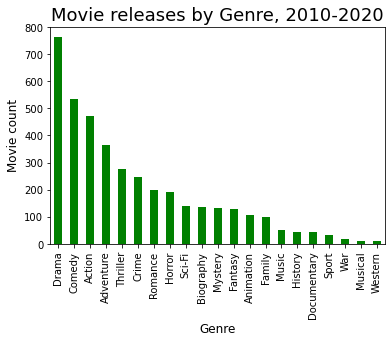

In [104]:
##histogram
df_split_genre['genre_split'].value_counts().plot(kind='bar', color='g');
plt.title('Movie releases by Genre, 2010-2020', size=18)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12);

In terms of the number of releases worldwide, dramas, comedies, and action topped the list between 2010 and 2020, with nearly 500 action films, more than 500 comedy films, and over 700 drama films released during that period. This means that the public currently loves these genres more than the other. It doesn't mean that these films will bring a return on investment, however. The success comes at a cost because these genres require a lot of elements such as big stars, high buget, so on.

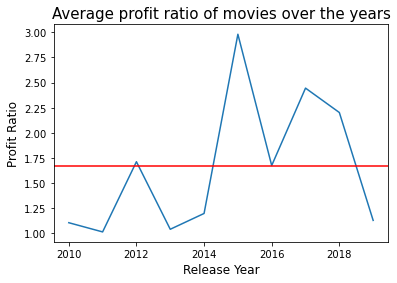

In [105]:
df_split_genre['start_year']= df_split_genre['release_date'].dt.year
gross_mean= df_split_genre.groupby(dataset['start_year'])['profit_ratio'].mean()
#print(gross_mean)
plt.plot(gross_mean)
plt.axhline(df_split_genre['profit_ratio'].mean(), color ='red')
plt.title('Average profit ratio of movies over the years', size=15);
plt.xlabel('Release Year', size=12)
plt.ylabel('Profit Ratio', size=12)
plt.legend;

We could see the average profit ratio tended to go up but the trend reversed significantly after 2018 because of the economic impact of Covid-19. The red line shows the average profit ratio over the years, which is 1.7. This mean that it is not easy to make a film which will make money.

### Hypothesis testing



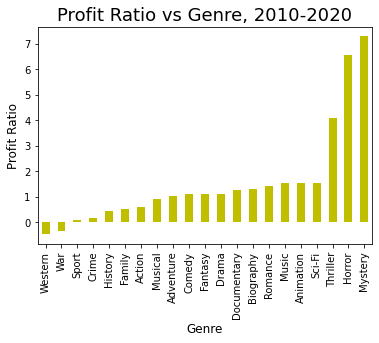

In [106]:
#tranform data set to keep only genre and profit ratio
profit_ratio_genre=df_split_genre.groupby('genre_split')['profit_ratio'].mean().sort_values()
genre_profit=df_split_genre[['genre_split','profit_ratio']].sort_values('genre_split').reset_index(level=0, drop=True)
profit_ratio_genre=df_split_genre.groupby('genre_split')['profit_ratio'].mean().sort_values()
profit_ratio_genre.plot(kind='bar', color='y');
plt.title('Profit Ratio vs Genre, 2010-2020', size=18)
plt.xlabel('Genre', size=12)
plt.ylabel('Profit Ratio', size=12);

It is clear that **mystery, horror, and thriller** are the top 3 genres with respect to profit ratio. These genres have a common and dedicated audience. This mean that as long as you have something to deliver on it (for example, if you do a haunting movie the ghost has to be scary or if you do a thriller, the movie has to be sufficiently exciting), the audience doesn't care a lot about the choice of actors or actress reputation. I would recommend that if you starting making films, these genres are good way to make money.  
Next, I used a one-way ANOVA to determine whether there are any statistically significant differences between the means of profit ratio in different genres.

In [107]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('profit_ratio ~ C(genre_split)', data=genre_profit).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(genre_split),12602.659279,20.0,4.192011,1.135141e-09
Residual,599767.100907,3990.0,NaN,NaN


The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among genres.

Then I wanted to know whether or not horror has a different mean profit_ratio than with mystery by a t-test.

In [108]:
horror=df_split_genre[df_split_genre['genre_split'] =="Horror"]['profit_ratio']
#horror
mystery=df_split_genre[df_split_genre['genre_split'] =="Mystery"]['profit_ratio']
#mystery
import scipy.stats as stats

# #perform two sample t-test
stats.ttest_ind(a=horror, b=mystery,nan_policy='omit')

Ttest_indResult(statistic=-0.19171913020997952, pvalue=0.8480819453023514)

We see that p value greater than 0.05 so we fail to reject the null hypothesis. There is no difference of the mean profit ratio between horror and mystery.

I wanted to know whether or not horror has a different mean profit_ratio than action by a t-test.

In [109]:
horror=df_split_genre[df_split_genre['genre_split'] =="Horror"]['profit_ratio']
#horror
action=df_split_genre[df_split_genre['genre_split'] =="Action"]['profit_ratio']
#action
stats.ttest_ind(a=horror, b=action ,nan_policy='omit')

Ttest_indResult(statistic=4.029432560755676, pvalue=6.241193309724377e-05)

We see that p value less than 0.05 so we reject the null hypothesis. There is a significant difference in mean profit ratio between horror and action.

### Genre recommendations

There is a statistically significant correlation between genre and profit ratio in the data. The genres of *mystery, horror, and thriller* return several times more than their nearest competitors on average.

However, these results are limited in their predictive power because the much of the data has more than one genre attached, which defies simple analysis. More work is needed to understand these potential cross-genre effects. Additionally, genre popularity has shifted throughout the years, so these results are only valid within a limited timeframe.

# Ratings by Director versus Profit and Profit Ratio

In addition to exploring profits of different movie genres, we will explore which kinds of directors could help Computing Vision generate profits most effectively. In particular, we will be investingating the relationship between average movie rating by director with profit and profit ratio.

### Creating Standardized Ratings Column 

In [110]:
# Create columns representing all movie ratings out of 10 stars
reviews['num_stars'] = reviews['rating'].map(lambda x : float(x.split('/')[0]))
reviews['out_of_stars'] = reviews['rating'].map(lambda x : float(x.split('/')[1]))
reviews['rating_out_of_10'] = reviews['num_stars'] / reviews['out_of_stars'] * 10

# Replace bogus values with NaN
reviews['rating'].replace('-1/1', np.nan, inplace=True)
reviews['num_stars'].replace(-1.0, np.nan, inplace=True)
reviews['out_of_stars'].replace(1.0, np.nan, inplace=True)
reviews['rating_out_of_10'].replace(-10.0, np.nan, inplace=True)

### Exploratory Data Analysis on Rotten Tomatoes Ratings

The following histogram presents the distribution of movie ratings (out of 10). The ratings, each between 0 and 10, are classified into 10 bins whose frequencies are plotted.

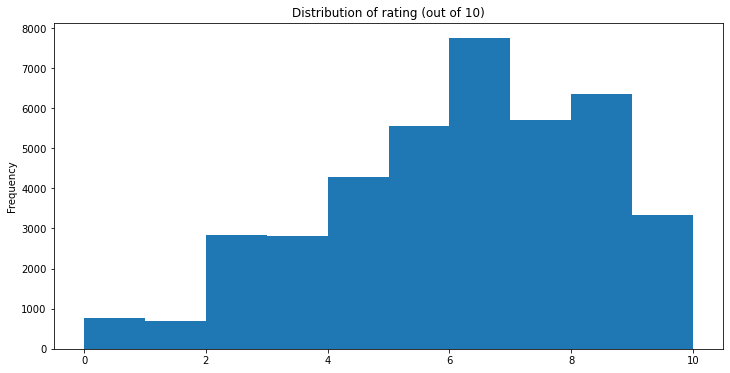

In [111]:
reviews['rating_out_of_10'].plot(figsize=(12,6), kind='hist', title='Distribution of rating (out of 10)', bins=10);

In [112]:
reviews['rating_out_of_10'].mean()

5.91708490119365

In [113]:
reviews['rating_out_of_10'].median()

6.0

In [114]:
reviews['rating_out_of_10'].mode()

0    6.0
dtype: float64

We have found that movies average approximately **6 out of 10 stars**. We could consider movies with below 6 out of 10 stars to be below average and movies with above 6 out of 10 stars to be above average.

### Research Question
Do a **director's previous movie ratings** relate to the **profit** and/or **profit ratio** that their movies generate?

### Approach
To answer this question, we will begin by creating two groups of directors - those with a "good" average movie rating, and those with a "bad" average movie rating. We will determine a threshold by which we can classify ratings as "good" or "bad" upon investigating Rotten Tomatoes rating data. To determine the threshold, we will group the reviews into those with a "fresh" flag and those with a "rotten" flag, then will investigate the distribution of ratings in each. We will also consider the results from the exploratory data analysis performed above.

Upon choosing a threshold, we will use IMDB databases joined with movie budget data from The Numbers to calculate mean movie rating by director along with the director's mean profit and mean profit ratio. In particular, we are interested in established directors - those who have received over 1,000 reviews and have worked on at least two movies. We will then split these directors into two groups - one group with mean ratings of greater than or equal to the threshold, and one with mean ratings below the threshold.

We will then conduct hypothesis tests to determine whether there is a relationship between:
* Mean rating by director and mean profit
* Mean rating by director and mean profit ratio

### Determining a Threshold

In [115]:
rotten_tomatoes = movie_info.merge(reviews, on='id')

In [116]:
# Obtain lists of "rotten" and "fresh" reviews
fresh_reviews = rotten_tomatoes.loc[rotten_tomatoes['fresh'] == 1]
rotten_reviews = rotten_tomatoes.loc[rotten_tomatoes['fresh'] == 0]

Here we will investigate the distributions of "rotten" movie review ratings and "fresh" movie review ratings. We will generate overlayed histograms to visualize how the distributions of rotten movie ratings and fresh movie ratings compare to each other.

C:\Users\alexwhite2\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\alexwhite2\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



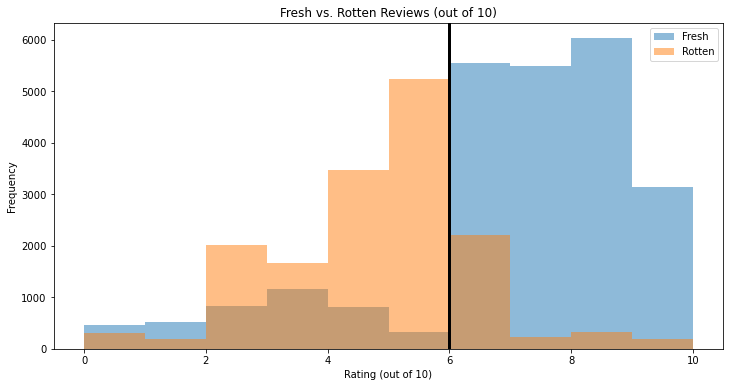

In [117]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(fresh_reviews['rating_out_of_10'], alpha=0.5)
ax.hist(rotten_reviews['rating_out_of_10'], alpha=0.5)
ax.set_title("Fresh vs. Rotten Reviews (out of 10)")
ax.set_xlabel("Rating (out of 10)")
ax.set_ylabel("Frequency")
ax.legend(['Fresh','Rotten'])
plt.axvline(x=6, color='black', lw=3);

We note that there are some low ratings corresponding to "fresh" reviews, as well as some high ratings corresponding to "rotten" reviews. We are unsure of why this occurs.

Based upon the visualization above, 6 stars out of 10 appears to be the point where reviews transition from mostly rotten to mostly fresh. We also observed previously that the overall distribution of ratings has a center near 6 out of 10. We will use **6 stars out of 10** as a threshold to differentiate between positive reviews and negative reviews.

### Gathering Data
<span style="color: red">TODO Nate</span>

In [118]:
movie_budgets['profit'] = movie_budgets['worldwide_gross']-movie_budgets['production_budget']

directorRatings = pd.read_sql("""
    SELECT 
    persons.primary_name AS director, movie_basics.original_title AS title, movie_ratings.averagerating AS AVG_Movie_rating
    FROM persons
    JOIN principals
        USING(person_id)
    JOIN movie_basics
        USING(movie_id)
    JOIN movie_ratings
        USING(movie_id)
    GROUP BY persons.primary_name
    HAVING principals.category == 'director' AND movie_ratings.numvotes >= 1000 AND COUNT(movie_ratings.movie_id) > 1
    ORDER BY AVG_Movie_rating DESC
  ;
""", conn)

directorRatings['title'] = directorRatings['title'].str.upper()

budgetJoinDirector = movie_budgets.merge(directorRatings, left_on = 'title', right_on='title')

budgetJoinDirector['year'] = budgetJoinDirector['release_date'].dt.year

budgetJoinDirector = budgetJoinDirector.loc[budgetJoinDirector['year'] >= 2010]

budgetJoinDirector=budgetJoinDirector.drop('id', axis =1)
budgetJoinDirector=budgetJoinDirector.drop('release_date', axis =1)
budgetJoinDirector=budgetJoinDirector.drop('title', axis =1)


budgetJoinDirector['profit'] = budgetJoinDirector['worldwide_gross']-budgetJoinDirector['production_budget']
budgetJoinDirector['profitRatio'] = (budgetJoinDirector['worldwide_gross'] - budgetJoinDirector['production_budget'])/ budgetJoinDirector['production_budget']

budgetJoinDirector['positive_review'] = budgetJoinDirector['AVG_Movie_rating'] >= 6

grouped = budgetJoinDirector.groupby('director').mean().sort_values('AVG_Movie_rating', ascending = False)

### Investigating Data

In [119]:
avg_movie_rating = grouped['AVG_Movie_rating']
avg_profit = grouped['profit']
profitRatioGroup = grouped['profitRatio']

We will first investigate the distributions of profit and profit ratio. Below are histograms corresponding to each. Note that the axes have differing units and scales. Also note the use of scientific notation along the x and y axes in the first plot.

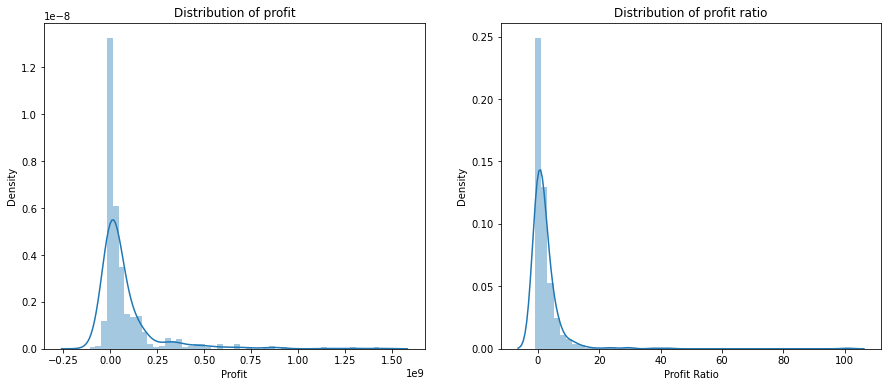

In [120]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))
sns.distplot(avg_profit, ax=ax[0])
sns.distplot(profitRatioGroup, ax=ax[1])
ax[0].set_title('Distribution of profit')
ax[0].set_xlabel('Profit')
ax[0].set_ylabel('Density')
ax[1].set_title('Distribution of profit ratio')
ax[1].set_xlabel('Profit Ratio')
ax[1].set_ylabel('Density');

It appears that our profit and profit ratio data contains several outliers. We will trim these outliers using the **IQR rule** before proceeding with our analysis so we can focus on typical profits.

### Investigating Trimmed Data

In [121]:
# IQR Rule: keep values in interval [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

Q1 = grouped['profit'].quantile(0.25)
Q3 = grouped['profit'].quantile(0.75)
IQR = Q3-Q1
grouped_trimmed = grouped.loc[(grouped['profit'] >= Q1-1.5*IQR) & (grouped['profit'] <= Q3 + 1.5*IQR)]
avg_movie_rating = grouped_trimmed['AVG_Movie_rating']
avg_profit = grouped_trimmed['profit']

Q1 = grouped['profitRatio'].quantile(0.25)
Q3 = grouped['profitRatio'].quantile(0.75)
IQR = Q3-Q1
grouped_clean = grouped.loc[(grouped['profitRatio'] >= Q1-(1.5*IQR)) & (grouped['profitRatio'] <= Q3 + 1.5*IQR)]
profitRatio = grouped_clean['profitRatio']
avg_movie_rating_ratio = grouped_clean['AVG_Movie_rating']

Again we plot the distributions of profit and profit ratio. Observe that extreme values have been trimmed.

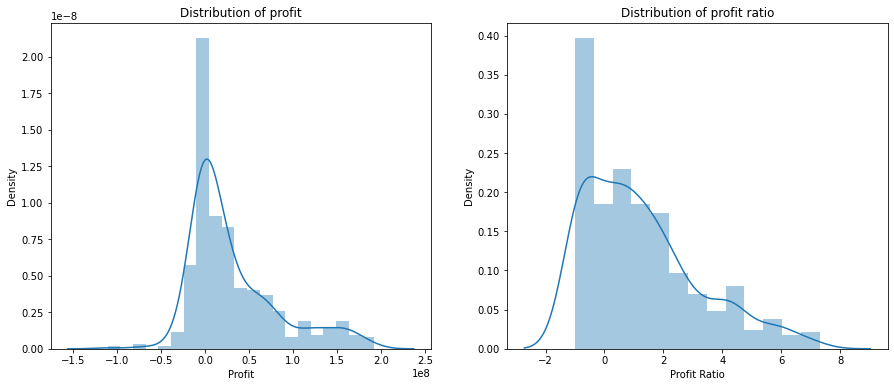

In [122]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))
sns.distplot(avg_profit, ax=ax[0])
sns.distplot(profitRatio, ax=ax[1])
ax[0].set_title('Distribution of profit')
ax[0].set_xlabel('Profit')
ax[0].set_ylabel('Density')
ax[1].set_title('Distribution of profit ratio')
ax[1].set_xlabel('Profit Ratio')
ax[1].set_ylabel('Density');

In [123]:
# Split profits into two groups based on mean director rating
greaterThanEqual6_trimmed = grouped_trimmed.loc[avg_movie_rating >= 6]['profit']
lessThan6_trimmed = grouped_trimmed.loc[avg_movie_rating < 6]['profit']

# Split profit ratios into two groups based on mean director rating
greaterThanEqual6_trimmed_ratio = grouped_clean.loc[grouped_clean['AVG_Movie_rating'] >= 6]['profitRatio']
lessThan6_trimmed_ratio = grouped_clean.loc[grouped_clean['AVG_Movie_rating'] < 6]['profitRatio']

Below we will generate scatter plots with regression lines for mean movie rating by director vs. mean profit and mean movie rating by director vs. mean profit ratio. We will also plot a vertical red line in each graph at x=6 where we differentiate good ratings from bad ratings. These plots will allow us to visualize the relationships between director and profit as well as profit ratio. Again note the different units and scales of the y-axes as well as the use of scientific notation in the y-axis in the first graph.

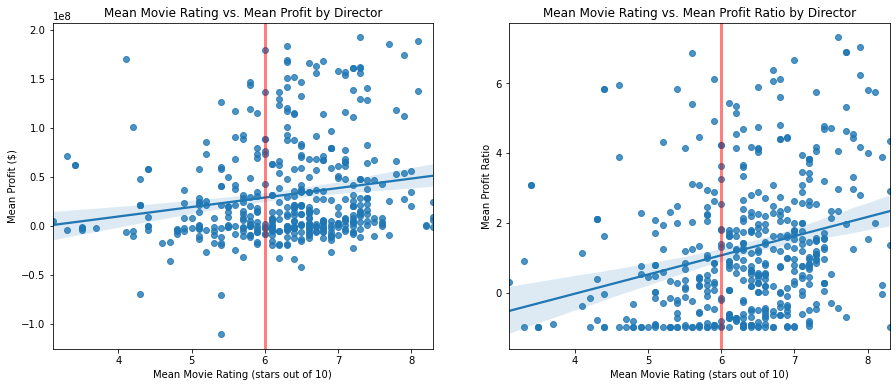

In [124]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))
sns.regplot(avg_movie_rating, avg_profit, ax=ax[0])
ax[0].axvline(6, color='red', lw=3, alpha=0.5);
ax[0].set_title('Mean Movie Rating vs. Mean Profit by Director')
ax[0].set_xlabel('Mean Movie Rating (stars out of 10)')
ax[0].set_ylabel('Mean Profit ($)')

sns.regplot(avg_movie_rating_ratio, profitRatio, ax=ax[1])
ax[1].axvline(6, color='red', lw=3, alpha=0.5);
ax[1].set_title('Mean Movie Rating vs. Mean Profit Ratio by Director')
ax[1].set_xlabel('Mean Movie Rating (stars out of 10)')
ax[1].set_ylabel('Mean Profit Ratio')
plt.ticklabel_format(style='plain');

It appears that our profit data contains several outliers. We will trim these outliers using the **IQR rule** before proceeding with our analysis so we can focus on typical profits.

### Investigating Trimmed Data
<span style="color: red; font-size:4em">Is this a duplicate section?</span>

In [45]:
Q1 = grouped['profit'].quantile(0.25)
Q3 = grouped['profit'].quantile(0.75)
IQR = Q3-Q1
grouped_trimmed = grouped.loc[(grouped['profit'] >= Q1-1.5*IQR) & (grouped['profit'] <= Q3 + 1.5*IQR)]

avg_movie_rating = grouped_trimmed['AVG_Movie_rating']
avg_profit = grouped_trimmed['profit']

In [46]:
Q1 = grouped['profitRatio'].quantile(0.25)
Q3 = grouped['profitRatio'].quantile(0.75)
IQR = Q3-Q1

grouped_clean = grouped.loc[(grouped['profitRatio'] >= Q1-(1.5*IQR)) & (grouped['profitRatio'] <= Q3 + 1.5*IQR)]

profitRatio = grouped_clean['profitRatio']
avg_movie_rating_ratio = grouped_clean['AVG_Movie_rating']

Text(0.5, 1.0, 'Distribution of mean movie rating per director')

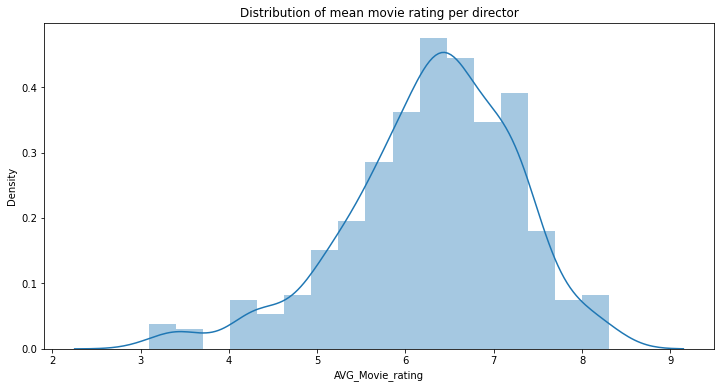

In [47]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(avg_movie_rating)
ax.set_title('Distribution of mean movie rating per director')

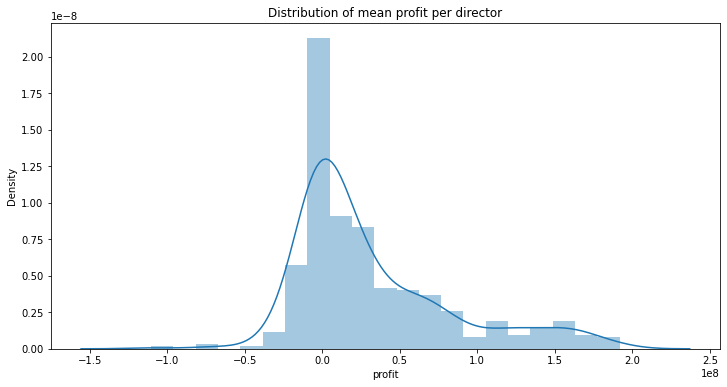

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(avg_profit)
ax.set_title('Distribution of mean profit per director');

Text(0.5, 1.0, 'Distribution of profit Ratio per director')

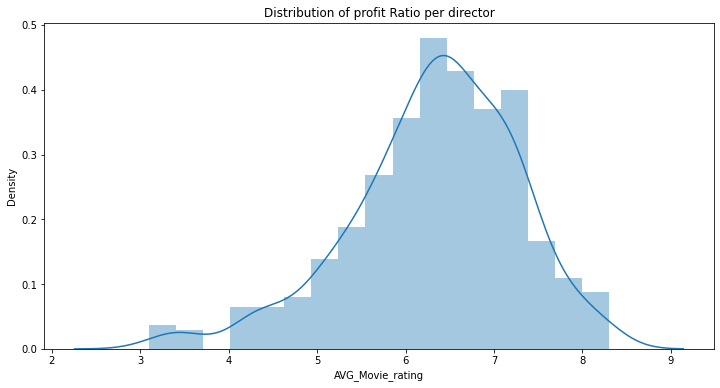

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(avg_movie_rating_ratio)
ax.set_title('Distribution of profit Ratio per director')


Text(0.5, 1.0, 'Distribution of profit Ratio per director')

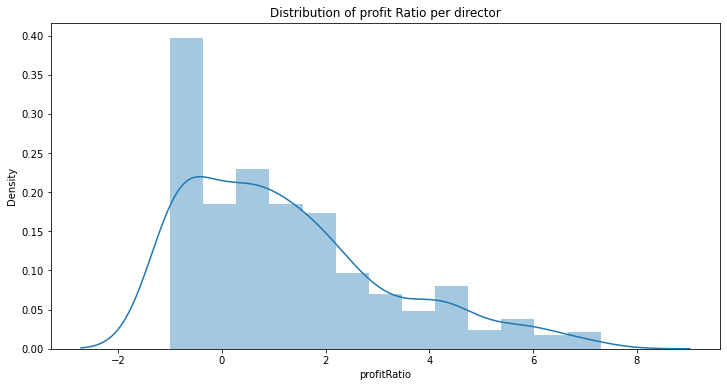

In [50]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(profitRatio)
ax.set_title('Distribution of profit Ratio per director')

In [51]:
greaterThanEqual6_trimmed = grouped_trimmed.loc[avg_movie_rating >= 6]['profit']
lessThan6_trimmed = grouped_trimmed.loc[avg_movie_rating < 6]['profit']

In [52]:
greaterThanEqual6_trimmed_ratio = grouped_clean.loc[grouped_clean['AVG_Movie_rating'] >= 6]['profitRatio']
lessThan6_trimmed_ratio = grouped_clean.loc[grouped_clean['AVG_Movie_rating'] < 6]['profitRatio']

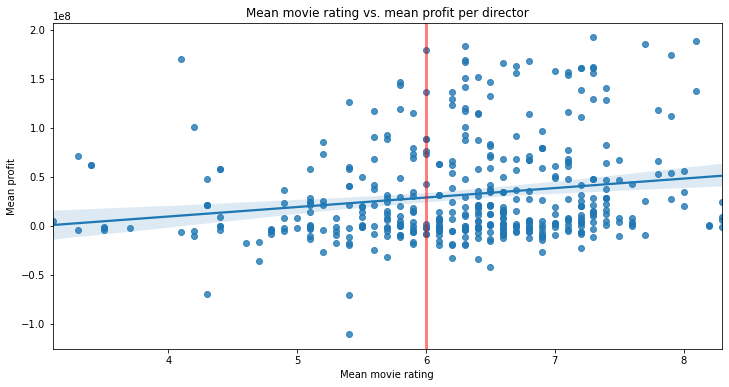

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.regplot(avg_movie_rating, avg_profit)
ax.axvline(6, color='red', lw=3, alpha=0.5);
ax.set_title('Mean movie rating vs. mean profit per director')
ax.set_xlabel('Mean movie rating')
ax.set_ylabel('Mean profit');

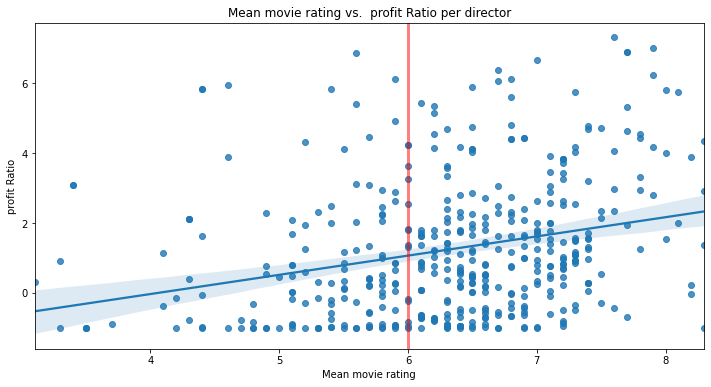

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.regplot(avg_movie_rating_ratio, profitRatio )
ax.axvline(6, color='red', lw=3, alpha=0.5);
ax.set_title('Mean movie rating vs.  profit Ratio per director')
ax.set_xlabel('Mean movie rating')
ax.set_ylabel('profit Ratio');

In [55]:
#for the profit
np.corrcoef(avg_movie_rating, avg_profit)[0][1]

0.180997452442317

In [56]:
greaterThanEqual6_trimmed.mean()

37372798.47979798

In [57]:
lessThan6_trimmed.mean()

18683923.664233577

In [58]:
greaterThanEqual6_trimmed.mean() - lessThan6_trimmed.mean()

18688874.815564405

In [59]:
greaterThanEqual6_trimmed.std(ddof=1)**2

2851196205844287.0

In [60]:
lessThan6_trimmed.std(ddof=1)**2

1744435558069636.8

In [61]:
#fir the profit ratio
np.corrcoef(avg_movie_rating_ratio, profitRatio)[0][1]

0.2689343683676368

#### Observations
* There is a **slight positive relationship** between mean movie rating by director and mean profit.
* There is a **slight positive relationship** between mean movie rating by director and mean profit ratio.
* Mean profit **differs** by rating group; so does mean profit ratio.
* Variance of profit **differs** by rating group, so does variance of profit ratio.

### Analysis

We will use hypothesis testing to evaluate our suspicion that directors with high historical ratings (averaging at least 6 out of 10) generate higher profits and profit ratios than directors with low historical ratings (averaging less than 6 out of 10). Using $\alpha=0.05$, we will conduct one-tailed unpaired Welch's t-tests (which do *not* assume that population variances are equal).

#### Test 1
Let:

> $\mu_{Profit, GE6}$ denote the mean profit for directors with a mean rating of greater than or equal to 6;

> $\mu_{Profit, L6}$ denote the mean profit for directors with a mean rating of less than 6.


$H_{0}: \mu_{Profit, GE6} - \mu_{Profit, L6} = 0$

$H_{A}: \mu_{Profit, GE6} - \mu_{Profit, L6} > 0$

#### Test 2
Let:

> $\mu_{Ratio, GE6}$ denote the mean profit *ratio* for directors with a mean rating of greater than or equal to 6;

> $\mu_{Ratio, L6}$ denote the mean profit *ratio* for directors with a mean rating of less than 6.


$H_{0}: \mu_{Ratio, GE6} - \mu_{Ratio, L6} = 0$

$H_{A}: \mu_{Ratio, GE6} - \mu_{Ratio, L6} > 0$

In [62]:
# Test 1
statistic, pvalue = st.ttest_ind(greaterThanEqual6_trimmed, lessThan6_trimmed, equal_var=False)
pvalue/2

4.686646375630644e-05

In [63]:
# Test 2
statistic, pvalue = st.ttest_ind(greaterThanEqual6_trimmed_ratio, lessThan6_trimmed_ratio, equal_var=False)
pvalue/2

5.2855105942360924e-05

### Results
Each of these p-values falls below our level of significance of $0.05$. We reject the null hypothesis in both cases.

### Conclusion
Our hypothesis tests yield strong evidence that directors with a mean rating greater than or equal to 6 out of 10 produce **greater mean profits and greater mean profit ratios** than directors with a lower mean rating.

## Recommendation
We recommend that Computing Vision hire directors with **strong historical movie ratings**.

<a name="season"></a>
## Season vs. Gross Profit 

### Research Question

##### Is there a direct correlation in which season a movie is released and the gross profits generated?

### Approach

We will begin by making needed adjustments to to the movie budgets and movie gross data frames. Following the required adjustments we will merge the two data frames into one. We will then filter and clean the merged data frame to till we recieve the desired output to run our statistical analysis and create the appropriate visualizions that compare season relase date to gross profits

separate release date

Create new collumn as release month

In [64]:
release_month = movie_budgets['release_date'].dt.strftime('%m')
movie_budgets['release_month']= release_month

Create new collumn for relase year

In [65]:
release_year = movie_budgets['release_date'].dt.strftime('%Y')
movie_budgets['release_year']= release_year

In [66]:
#create dictionary to set individual month number to correlated season
#Season: spring = 1, summer=2, fall= 3, winter=4
season_dict = {'01': '4',
               '02': '4',
               '03': '1', 
               '04': '1',
               '05': '1',
               '06': '2',
               '07': '2',
               '08': '2',
               '09': '3',
               '10': '3',
               '11': '3',
               '12': '4'}
movie_budgets['Season'] = movie_budgets['release_month'].apply(lambda x: season_dict[x])

convert relase month, release year, and season to integers

In [67]:
movie_budgets['release_year']  = movie_budgets['release_year'].astype("int")
movie_budgets['release_month']  = movie_budgets['release_month'].astype("int")
movie_budgets['Season']  = movie_budgets['Season'].astype("int")

#### Merge Gross and budgets

In [68]:
movieGrossJoinBudgets = pd.DataFrame.merge(movie_gross, movie_budgets, on = 'title')

Check for null values

Set Null Values to 0 because it is assumed that if there is no value for foreign and domestic markets that there were no sales in that market. Changing null values to 0 allowed us to build a better analysis

In [69]:
movieGrossJoinBudgets.fillna(0, inplace = True)

calculate for inflations in the merged data frame. This will give us a more accurate representation of the data

In [70]:
i = 0
for row in movieGrossJoinBudgets.itertuples(index = False):
    if row[4] == 2010:
        movieGrossJoinBudgets.iat[i,2] = row[2] * ((8*.0151) + 1)

    if row[4] == 2011:
        movieGrossJoinBudgets.iat[i,2] = row[2] * ((7*.0151) + 1)

    if row[4] == 2012:
        movieGrossJoinBudgets.iat[i,2] = row[2] * ((6*.0151) + 1)

    if row[4] == 2013:
        movieGrossJoinBudgets.iat[i,2] = row[2] * ((5*.0151) + 1)

    if row[4] == 2014:
        movieGrossJoinBudgets.iat[i,2] = row[2] * ((4*.0151) + 1)

    if row[4] == 2015:
        movieGrossJoinBudgets.iat[i,2] = row[2] * ((3*.0151) + 1)

    if row[4] == 2016:
        movieGrossJoinBudgets.iat[i,2] = row[2] * ((2*.0151) + 1)

    if row[4] == 2017:
        movieGrossJoinBudgets.iat[i,2] = row[2] * ((1*.0151) + 1)

    i +=1

In [71]:
i = 0
for row in movieGrossJoinBudgets.itertuples(index = False):
    if row[4] == 2010:
        movieGrossJoinBudgets.iat[i,3] = row[3] * ((8*.0151) + 1)

    if row[4] == 2011:
        movieGrossJoinBudgets.iat[i,3] = row[3] * ((7*.0151) + 1)

    if row[4] == 2012:
        movieGrossJoinBudgets.iat[i,3] = row[3] * ((6*.0151) + 1)

    if row[4] == 2013:
        movieGrossJoinBudgets.iat[i,3] = row[3] * ((5*.0151) + 1)

    if row[4] == 2014:
        movieGrossJoinBudgets.iat[i,3] = row[3] * ((4*.0151) + 1)

    if row[4] == 2015:
        movieGrossJoinBudgets.iat[i,3] = row[3] * ((3*.0151) + 1)

    if row[4] == 2016:
        movieGrossJoinBudgets.iat[i,3] = row[3] * ((2*.0151) + 1)

    if row[4] == 2017:
        movieGrossJoinBudgets.iat[i,3] = row[3] * ((1*.0151) + 1)

    i +=1

In [72]:
#Drop collumn domestic_gross_y
# before this step there were two domestic gross collumns and this collumn is not needed for our analysis
movieGrossJoinBudgets.drop(['domestic_gross_y'], axis=1, inplace=True)

In [73]:
#group the merged datafram by seasons.
#use group data mean values.
#We are mesureing the the gross profit for each season. 
GrossJoinBudgetGrouped = movieGrossJoinBudgets.groupby('Season').mean()

In [74]:
#Drop all unneeded collumns for the remainder of the analysis.
GrossJoinBudgetGrouped.drop(['year', 'id', 'production_budget', 'worldwide_gross', 'release_month', 'release_year', 'profit'], axis=1, inplace=True)

Remove Outliers

In [75]:
Q1 = movieGrossJoinBudgets['domestic_gross_x'].quantile(0.25)
Q3 = movieGrossJoinBudgets['domestic_gross_x'].quantile(0.75)
IQR = Q3 - Q1

grouped_trimmed = movieGrossJoinBudgets.loc[(movieGrossJoinBudgets['domestic_gross_x'] >= Q1-1.5*IQR) & (movieGrossJoinBudgets['domestic_gross_x'] <= Q3 + 1.5*IQR)]

domSpring = grouped_trimmed.loc[(movieGrossJoinBudgets['Season'] == 1)]['domestic_gross_x']
domSummer = grouped_trimmed.loc[(movieGrossJoinBudgets['Season'] == 2)]['domestic_gross_x']
domFall = grouped_trimmed.loc[(movieGrossJoinBudgets['Season'] == 3)]['domestic_gross_x']
domWinter = grouped_trimmed.loc[(movieGrossJoinBudgets['Season'] == 4)]['domestic_gross_x']

In [76]:
Q1 = movieGrossJoinBudgets['foreign_gross'].quantile(0.25)
Q3 = movieGrossJoinBudgets['foreign_gross'].quantile(0.75)
IQR = Q3 - Q1

grouped_trimmed = movieGrossJoinBudgets.loc[(movieGrossJoinBudgets['foreign_gross'] >= Q1-1.5*IQR) & (movieGrossJoinBudgets['foreign_gross'] <= Q3 + 1.5*IQR)]

forSpring = grouped_trimmed.loc[(movieGrossJoinBudgets['Season'] == 1)]['foreign_gross']
forSummer = grouped_trimmed.loc[(movieGrossJoinBudgets['Season'] == 2)]['foreign_gross']
forFall = grouped_trimmed.loc[(movieGrossJoinBudgets['Season'] == 3)]['foreign_gross']
forWinter = grouped_trimmed.loc[(movieGrossJoinBudgets['Season'] == 4)]['foreign_gross']

Creat a chart to represent the data

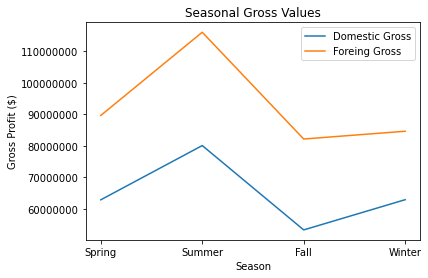

In [77]:
x = ['Spring', 'Summer', 'Fall', 'Winter']
domestic_gross_x = [6.286046e+07, 8.006786e+07, 5.330879e+07, 6.289587e+07]
foreign_gross = [8.961715e+07, 1.160124e+08, 8.214393e+07, 8.460717e+07]

plt.plot(x, domestic_gross_x, label = 'Domestic Gross')

# Plot another line on the same chart/graph
plt.plot(x, foreign_gross, label = 'Foreing Gross')
plt.title('Seasonal Gross Values')
plt.xlabel('Season')
plt.ylabel('Gross Profit ($)')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.legend()
plt.show()

plt.show()

Here we see a bar chart comparing the average gross profit for each season of the movies from the data's release date. The chart looks to clearly show that summer release dates generate the highest gross profit. Now let us test this through a hypthoesis test.

#### Hypothesis Testing

##### Hypothesis
    Null: There is no significant difference between the summer release dates and non summer release dates. H0:𝜇 ≥ 𝑥¯  
    Alternative: The the gross value is significantly bigger when released than not released in summer mean. 𝐻𝑎: 𝜇<𝑥¯
    Alpha= .02

**We will be performing a one sample T-test**  


In [78]:
winter = movieGrossJoinBudgets['Season'].values == 4
spring = movieGrossJoinBudgets['Season'].values == 1
fall = movieGrossJoinBudgets['Season'].values == 3

forSpring = movieGrossJoinBudgets.loc[spring]['foreign_gross']
domSpring = movieGrossJoinBudgets.loc[spring]['domestic_gross_x']
forFall = movieGrossJoinBudgets.loc[fall]['foreign_gross']
domFall = movieGrossJoinBudgets.loc[fall]['domestic_gross_x']
forWinter = movieGrossJoinBudgets.loc[winter]['foreign_gross']
domWinter = movieGrossJoinBudgets.loc[winter]['domestic_gross_x']

In [79]:
# T-test for foriegn market in summer
stat, pval = st.ttest_1samp(forSummer, movieGrossJoinBudgets['foreign_gross'].mean())
print(pval)

4.851278390839621e-27


In [80]:
#T-test for domestic market for summer
stat, pval = st.ttest_1samp(domSummer, movieGrossJoinBudgets['domestic_gross_x'].mean())
print(pval)

3.2163076229497447e-07


###  Decision

Since pvalue both pvalue for foreign and domestic gross are less than an alpha = .02 we reject the null.  
Stating that we are 98% sure that movies released in the Summer will result in larger gross profits.

### ANOVA Test



Ho: There is no significant differnce in gross profit values between seasons

Ha: There is a significant difference in gross profit values between seasons

Alpha =0.02

In [81]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('foreign_gross ~ C(Season)', data=movieGrossJoinBudgets).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Season),2.427040e+17,3.0,3.382495,0.017637
Residual,3.116469e+19,1303.0,NaN,NaN


In [82]:
model = ols('domestic_gross_x ~ C(Season)', data=movieGrossJoinBudgets).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Season),1.279204e+17,3.0,5.427947,0.001037
Residual,1.023593e+19,1303.0,NaN,NaN


We conclude that there is a statistical difference between at least one pair of seasons. 

We will test summer against each season to see if it performs significantly better than each.

#### Now lets test summer to each season of the year 

In [83]:
#summer vs spring: foreign
stat, pval = st.ttest_ind(forSummer,forSpring,equal_var = False)
sumVsprF = pval/2

In [84]:
#summer vs fall: foreign
stat, pval =st.ttest_ind(forSummer,forFall,equal_var = False)
sumVfallF = pval/2

In [85]:
#summer vs winter: foreign
stat, pval =st.ttest_ind(forSummer,forWinter,equal_var = False)
sumVwinF = pval/2

In [86]:
#summer vs spring: Domestic
stat, pval =st.ttest_ind(domSummer,domSpring,equal_var = False)
sumVsprD = pval/2

In [87]:
#summer vs fall: domestic
stat, pval =st.ttest_ind(domSummer,domFall,equal_var= False)
sumVFallD =  pval/2

In [88]:
#summer vs winter: domestic
stat, pval =st.ttest_ind(domSummer,domWinter,equal_var = False)
sumVWinD = pval/2


In [89]:
table = [[' ', 'Domestic P-value', 'Foreign P-value'], 
         ['summer vs spring', sumVsprD, sumVsprF], ['summer vs fall', sumVFallD, sumVfallF], 
         ['summer vs winter', sumVWinD, sumVwinF]]

In [90]:
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒══════════════════╤════════════════════╤═══════════════════╕
│                  │   Domestic P-value │   Foreign P-value │
╞══════════════════╪════════════════════╪═══════════════════╡
│ summer vs spring │         0.0154045  │       2.18692e-05 │
├──────────────────┼────────────────────┼───────────────────┤
│ summer vs fall   │         0.221692   │       2.46145e-05 │
├──────────────────┼────────────────────┼───────────────────┤
│ summer vs winter │         0.00829558 │       1.2565e-05  │
╘══════════════════╧════════════════════╧═══════════════════╛


Given alpha=0.02:
* We found a significant conclusion that summer is greater than all other seasons for the foreign market.
* We found a significant conclusion that summer is greater thans spring and winter for the domestic market.
* We did not find a significant difference showing that summer is greatter than fall in the domestic market.

### Conclusion and Recomendation 

We conclude that in most scenariors the compnay will generate the highest amount of gross profit if they release the film in the summer. We are 98% confident that this is true comparing summer to all seasons in the foreign market and comparing summer to Winter, and spring in the domestic market

<a name="conclusion"></a>
# <span style="color: blue">Conclusion</span>

### Findings

(budget, genres, directors, release season)  
Budget:  
Genre:  
Director:  
Release Season: 

### Recommendations

(budget, genres, directors, release season)  
Budget: high or low?  
Genre: what kind?  
Director: who?  
Release Season: when?

### Future Research

During our exploration of the data sets, we identified seveal areas of potential interest for future research.  

First, Natural language Processing technologies could extract key words from the written reviews and create a linkage mapping of possitve and negative review words. These could be used to guide the development direction of the studio.  

Second, we examined release dates using the whole set of movies in our database. However, it seems likely that certain styles of movie would perform better with distinct seasonal releases. For example, Halloween movies would likely be more popular in the fall, and spiritual movies might be better received during the winter.  

Third, our genre studies did not examine the effect of crossing genre on movie performance. It would be interesting to research the effects of blending genres, such as action and horror, on a film's performance.


### Appendix
 
<em>Personal Notebooks</em>
- [A. Donahue](https://github.com/cLineman/CapStoneProject/blob/main/personal_notebooks/Alex_Donahue.ipynb)
- [C. Lineman](https://github.com/cLineman/CapStoneProject/blob/main/personal_notebooks/ColtonLineman.ipynb)
- [N. Netznik](https://github.com/cLineman/CapStoneProject/blob/main/personal_notebooks/NateNetznik.ipynb)
- [T.V. Nguyen](https://github.com/cLineman/CapStoneProject/blob/main/personal_notebooks/ThiVanNguyen.ipynb)
- [A. White](https://github.com/cLineman/CapStoneProject/blob/main/personal_notebooks/AlexanderWhite.ipynb)

(significant tables / graphs) 

### Special Thanks

Our team would like to acknowledge Deloitte for its emphasis on training tomorrow's leaders through the development of this program. Specifically, we would like to recognize Ayush Giri for his work as our mentor. We would also like to acknowledge the impact of the Flatiron team and their instruction.

#### Thank you for your time.